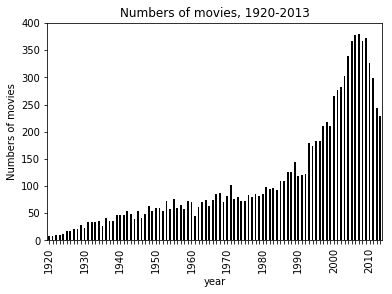

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import math
from data_gen import gen_df

# Defining function that rounds up to next hundred 
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

def fig3_J(time_var):
    # Importing data and making new dataframe
    filename = 'imdb.csv'
    df = gen_df(filename)
    imdb = df.copy()
    
    # Generate variable that counts number of observation/movies in each year
    imdb['temp']=1
    imdb['tot_film'] = imdb.groupby(time_var)['temp'].transform(lambda x : x.sum())
    del imdb['temp']

    # Make new dataframe that only take one value per year. 
    # The dataframe only contain the year indicator and number of movies in the given year
    y = pd.DataFrame(imdb.groupby(time_var)['tot_film'].first())
    y.reset_index(inplace=True)
    
    # Setting max value of y-axis to next hundred of max number of movies
    temp = imdb['tot_film'].max()
    y_max = roundup(temp)
    
    # Plotting the number of movies per year    
    ax1 = y.plot(x=time_var, y = 'tot_film', color='black', kind='bar', legend=False)
    ax1.set_ylabel('Numbers of movies')
    ax1.set_title(f'Numbers of movies, 1920-2013')
    ax1.set_ylim([0,y_max])
    
    if time_var == 'year':
        # Set labels, so every n'th (here 10) label is shown
        n = 10  
        [l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0];

fig3_J('year')

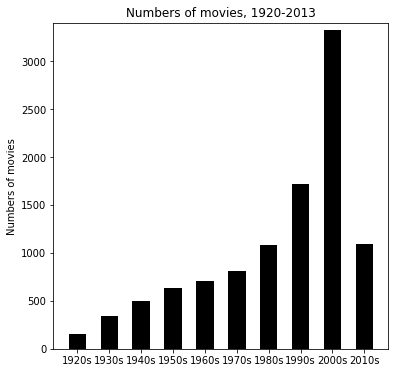

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import math
from data_gen import gen_df

# Defining function that rounds up to next hundred 
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

def fig3_J(time_var):
    # Importing data and making new dataframe
    filename = 'imdb.csv'
    df = gen_df(filename)
    imdb = df.copy()
    
    # Generate variable that counts number of observation/movies in each year
    imdb['temp']=1
    imdb['tot_film'] = imdb.groupby(time_var)['temp'].transform(lambda x : x.sum())
    del imdb['temp']

    # Make new dataframe that only take one value per year. 
    # The dataframe only contain the year indicator and number of movies in the given year
    y = pd.DataFrame(imdb.groupby(time_var)['tot_film'].first())
    y.reset_index(inplace=True)
    
    # Setting max value of y-axis to next hundred of max number of movies
    temp = imdb['tot_film'].max()
    y_max = roundup(temp)
    
    # Plotting the number of movies per year
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(1,1,1)
    
    ax1.bar(y[time_var], y['tot_film'], color='black', width=0.55)
    ax1.set_ylabel('Numbers of movies')
    ax1.set_title(f'Numbers of movies, 1920-2013')
    ax1.set_ylim([0,y_max])
    
fig3_J('decade')

## Gør interaktiv med år eller decade